In [2]:
import pandas as pd
import numpy as np

In [84]:
bus = pd.read_csv('data/bus.csv',encoding='cp949')
bus.head()

,지형지물,관리번호,관리기관,법정동,지번,정류장종류,위치,정류장유형,X,Y
0,정류장,83000001,용인시,공세동,717 도,마을버스,미지정,지붕설치,210537.479,415994.881
1,정류장,84000001,용인시,공세동,717 도,마을버스,미지정,지붕설치,210793.879,416207.872
2,정류장,85000001,용인시,공세동,717 도,마을버스,미지정,지붕설치,209657.840,415557.868
3,정류장,91281001,용인시,고기동,244-3도,마을버스,바다목장,표지설치,204626.268,428727.451
4,정류장,91282001,용인시,고기동,755천,마을버스,고기3리입구,표지설치,204888.481,428943.695


In [114]:
bus.정류장종류.value_counts()

일반버스        924
시내, 시외겸용    345
마을버스        108
미분류          82
택시           38
시외버스         18
기타            8
좌석버스          1
Name: 정류장종류, dtype: int64

In [115]:
bus.정류장유형.value_counts()

지붕설치    958
표지설치    484
미분류      80
기타        2
Name: 정류장유형, dtype: int64

In [5]:
#행과 열의 수입니다
bus.shape

(1524, 10)

In [7]:
#info를 통해 더많은 정보를 얻어줍니다
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지형지물    1524 non-null   object 
 1   관리번호    1524 non-null   int64  
 2   관리기관    1524 non-null   object 
 3   법정동     1524 non-null   object 
 4   지번      1524 non-null   object 
 5   정류장종류   1524 non-null   object 
 6   위치      1524 non-null   object 
 7   정류장유형   1524 non-null   object 
 8   X       1524 non-null   float64
 9   Y       1524 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 119.2+ KB


In [28]:
#기술통계량 구하기
bus.describe()

,관리번호,X,Y
count,1.524000e+03,1524.000000,1524.000000
mean,1.346800e+08,214655.934083,418048.281801
std,4.430982e+07,7550.055604,6875.996457
min,8.300000e+07,202977.184000,398641.214000
25%,9.232523e+07,208882.195750,414862.384000
50%,1.305060e+08,211709.527500,419143.165000
75%,2.011100e+08,219387.243750,423943.378250
max,2.015401e+08,236849.142000,429165.512000


In [30]:
#문자열에 대한 통계
bus.describe(include=['object']).T

,count,unique,top,freq
지형지물,1524,1,정류장,1524
관리기관,1524,1,용인시,1524
법정동,1524,102,풍덕천동,90
지번,1524,1108,1045도,15
정류장종류,1524,8,일반버스,924
위치,1524,751,,390
정류장유형,1524,4,지붕설치,958


In [ ]:
기술통계를 통해서 데이터형식변환으로 메모리를 줄여줍니다

In [31]:
#na값 확인
bus.isnull().sum()

지형지물     0
관리번호     0
관리기관     0
법정동      0
지번       0
정류장종류    0
위치       0
정류장유형    0
X        0
Y        0
dtype: int64

In [97]:
bus['관리번호']=bus['관리번호'].astype(np.int32)

In [85]:
bus['X']=bus['X'].astype(np.float32)
bus['Y']=bus['Y'].astype(np.float32)

In [89]:
#고유값이 적은걸 확인해준다
bus.select_dtypes(include=['object']).nunique()

지형지물        1
관리기관        1
법정동       102
지번       1108
정류장종류       8
위치        751
정류장유형       4
dtype: int64

In [93]:
bus['지형지물'] = bus['지형지물'].astype('category')
bus['관리기관'] = bus['관리기관'].astype('category')
bus['정류장종류'] = bus['정류장종류'].astype('category')
bus['정류장유형'] = bus['정류장유형'].astype('category')
bus['법정동'] = bus['법정동'].astype('category')

In [98]:
#데이터가 120kb 에서 60kb로 줄어들었다
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   지형지물    1524 non-null   category
 1   관리번호    1524 non-null   int32   
 2   관리기관    1524 non-null   category
 3   법정동     1524 non-null   category
 4   지번      1524 non-null   object  
 5   정류장종류   1524 non-null   category
 6   위치      1524 non-null   object  
 7   정류장유형   1524 non-null   category
 8   X       1524 non-null   float32 
 9   Y       1524 non-null   float32 
dtypes: category(5), float32(2), int32(1), object(2)
memory usage: 55.8+ KB


In [ ]:
groupby를 통해 각동마다 정류장종류,정류장유형의 수를 알수있다

In [62]:
(
    bus
    .groupby(['법정동','정류장종류'])
    .size()
    .unstack(fill_value=0)
)

정류장종류,기타,마을버스,미분류,"시내, 시외겸용",시외버스,일반버스,좌석버스,택시
법정동,,,,,,,,
가좌리,0,0,0,2,0,1,0,0
가창리,0,0,0,0,0,4,0,0
갈담리,0,0,4,2,0,5,0,0
고기동,0,8,13,0,0,0,0,0
고당리,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...
하갈동,0,0,3,3,0,5,0,0
학일리,0,0,0,0,0,1,0,0
해곡동,0,0,1,0,0,9,0,0


In [79]:
(
    bus
    .groupby(['법정동','정류장유형'])
    .size()
    .unstack(fill_value=0)
)

정류장유형,기타,미분류,지붕설치,표지설치
법정동,,,,
가좌리,0,0,2,1
가창리,0,0,4,0
갈담리,0,4,3,4
고기동,0,13,1,7
고당리,0,0,1,1
...,...,...,...,...
하갈동,0,3,7,1
학일리,0,0,1,0
해곡동,0,1,5,4


In [82]:
bus.정류장종류.value_counts()

일반버스        924
시내, 시외겸용    345
마을버스        108
미분류          82
택시           38
시외버스         18
기타            8
좌석버스          1
Name: 정류장종류, dtype: int64

In [86]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#한글 폰트 깨짐 방지

In [ ]:
용인시 전체 정류장종류의 개수를 그래프로 나타내기

<BarContainer object of 8 artists>

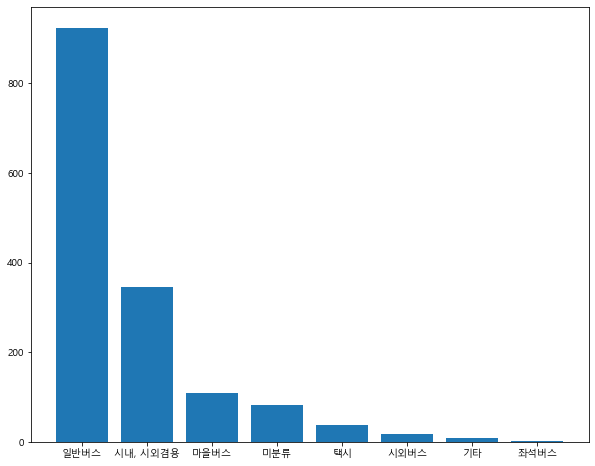

In [87]:
#matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.bar(bus.정류장종류.value_counts().index, bus.정류장종류.value_counts())

C:\Users\paul9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='정류장종류'>

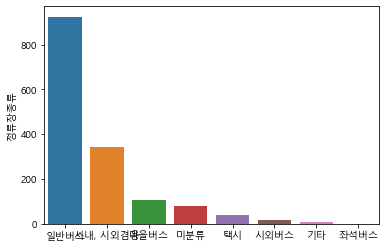

In [88]:
import seaborn as sns
sns.barplot(bus.정류장종류.value_counts().index, bus.정류장종류.value_counts())

In [89]:
bus.법정동.value_counts()

풍덕천동    90
죽전동     77
영덕동     54
신갈동     54
동천동     47
        ..
문촌리      1
학일리      1
호동       1
석천리      1
정수리      1
Name: 법정동, Length: 102, dtype: int64

In [90]:
top = bus.법정동.value_counts().index[:6]
top

Index(['풍덕천동', '죽전동', '영덕동', '신갈동', '동천동', '마북동'], dtype='object')

<AxesSubplot:xlabel='count', ylabel='법정동'>

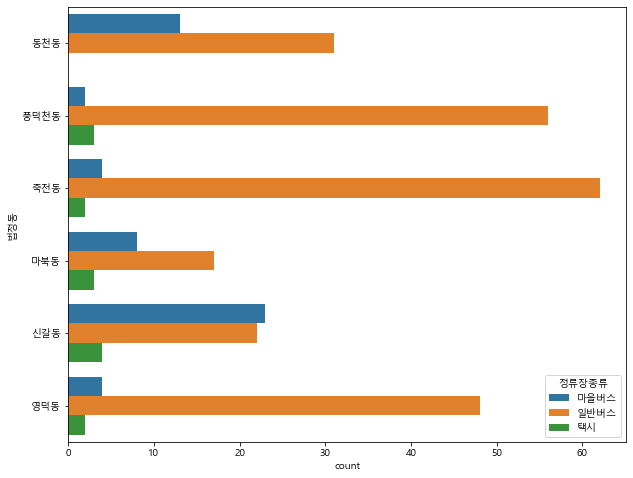

In [124]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
top = bus.법정동.value_counts().index[:6]
sns.countplot(y='법정동',
 data=(bus.assign(
 법정동=bus.법정동.where(bus.법정동.isin(top)))
 ),
              hue='정류장종류',
              hue_order=['마을버스', '일반버스', '택시'],
 )

In [133]:
법정동=bus['법정동']

In [136]:
asd=법정동.isin(['성복동','상하동'])
법정동[asd].value_counts()

성복동    40
상하동    21
Name: 법정동, dtype: int64

<BarContainer object of 2 artists>

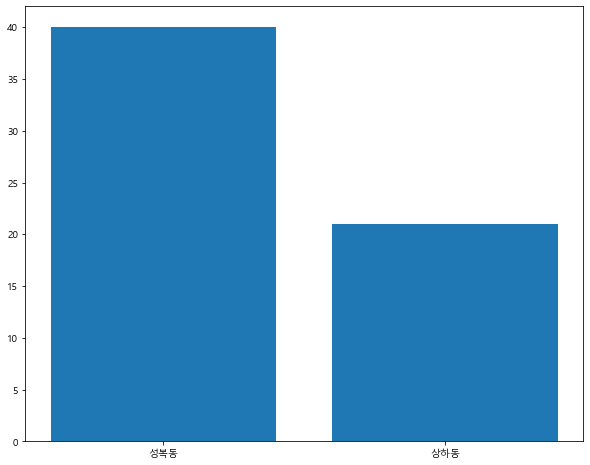

In [137]:
#matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.bar(법정동[asd].value_counts().index, 법정동[asd].value_counts())

<AxesSubplot:xlabel='count', ylabel='make'>

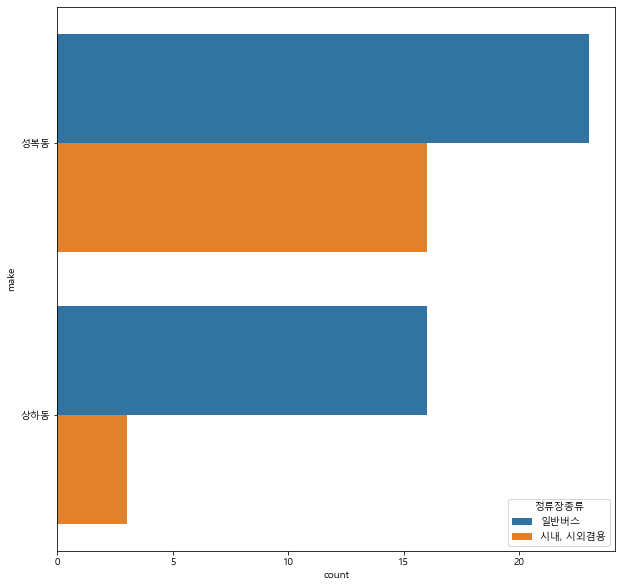

In [152]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10))
qwe=법정동[asd].value_counts().index[:2]
sns.countplot(y='make',
 data=(bus.assign(
 make=bus.법정동.where(bus.법정동.isin(qwe)))
 ),
              hue='정류장종류',
              hue_order=['일반버스','시내, 시외겸용'],
 )